# Project1

### 刘慎恒 518021910273

## 参考资料：
https://github.com/zealptekin/Mobile-Phone-Price-Prediction/blob/master/Project_Report_github.ipynb

https://zhuanlan.zhihu.com/p/79527876

《机器学习》 周志华

https://blog.csdn.net/index20001/article/details/73925325

https://dcpnonstop.github.io/2017/11/24/%E5%B9%B3%E6%BB%91%E5%A4%84%E7%90%86-%E6%8B%89%E6%99%AE%E6%8B%89%E6%96%AF%EF%BC%88laplace%EF%BC%89/

In [33]:
import pandas as pd
import numpy as np
import time
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import svm
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score 
import matplotlib.pyplot as plt
# 此处注释语句是使调用matplotlib.pyplot的绘图函数时，可以直接在python console里面生成图像
# %matplotlib inline
import seaborn as sns


filename="./archive/train.csv"
train_filename="./train/train.csv"
valid_filename="./train/valid.csv"
test_filename="./train/test.csv"

## 数据分析与处理

### 读取数据

In [34]:
data=pd.read_csv(filename)

### 数据展示

In [35]:
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [36]:
data.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')


Here is the attributes of our dataset:

id: ID

battery_power: Total energy a battery can store in one time 
measured in mAh

blue: Has bluetooth or not

clock_speed: speed at which microprocessor executes 
instructions

dual_sim: Has dual sim support or not

fc: Front Camera mega pixels

four_g: Has 4G or not

int_memory: Internal Memory in Gigabytes

m_dep: Mobile Depth in cm

mobile_wt: Weight of mobile phone

n_cores: Number of cores of processor

pc: Primary Camera mega pixels

px_height: Pixel Resolution Height

px_width: Pixel Resolution Width

ram: Random Access Memory in Megabytes

sc_h: Screen Height of mobile in cm

sc_w: Screen Width of mobile in cm

talk_time: longest time that a single battery charge will last when you are

three_g: Has 3G or not

touch_screen: Has touch screen or not

wifi: Has wifi or not

price_range: This is the target variable with value of 0 (low cost), 1 (medium cost), 2 (high cost) and 3 (very high cost)

In [37]:
data.shape

(2000, 21)

In [38]:
data.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

In [39]:
pd.isnull(data).sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

### 数据集内的数据值全部非空，为数据处理提供了方便

In [40]:
data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


### 划分数据

我们将用于训练的属性设为x，结果设为y

In [41]:
def data_to_x_y(data_in):
    data_y = data_in['price_range']
    data_x = data_in.drop('price_range', axis = 1)
    return data_x,data_y
x,y=data_to_x_y(data)

In [42]:
y.unique()

array([1, 2, 3, 0], dtype=int64)

### 数据映射
题目要求我们把price映射到 0 1 两个分类，下面开始映射

In [43]:
data.loc[data.price_range<2,'price_range']=0
data.loc[data.price_range>=2,'price_range']=1

In [44]:
x,y=data_to_x_y(data)

In [45]:
y.unique()

array([0, 1], dtype=int64)

### 查看数据集是否平衡

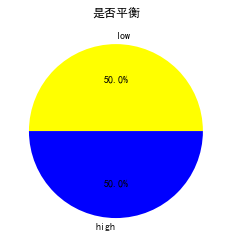

In [46]:
from pylab import *
mpl.rcParams['font.sans-serif'] = ['SimHei']

labels=["low", "high"]
values=data['price_range'].value_counts().values
fig1,ax1=plt.subplots()
colors = ['yellow','blue']
ax1.pie(values,labels=labels,colors=colors,autopct='%1.1f%%')
ax1.set_title("是否平衡")
plt.show()

可以发现数据比较平衡，训练出的模型效果会比较好

### 相关度分析

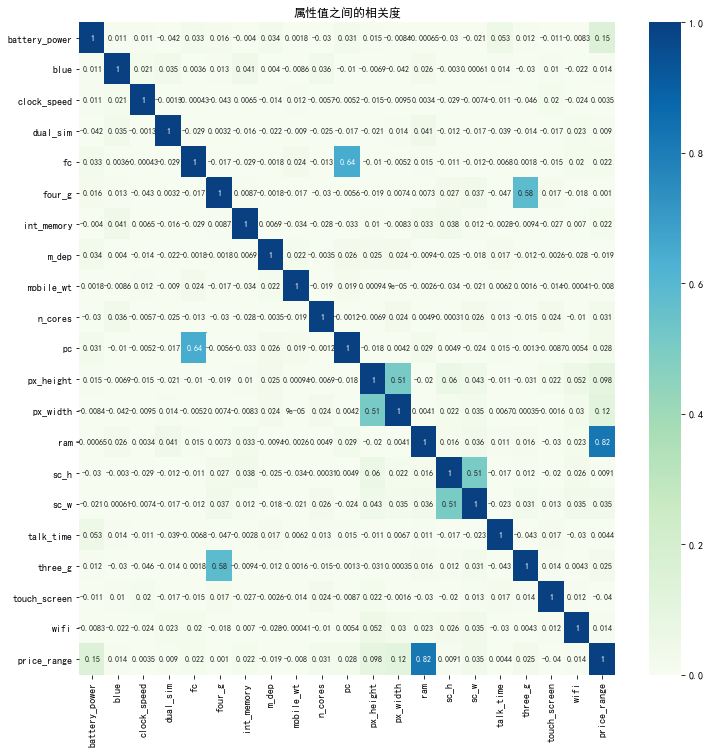

In [47]:
fig2=plt.subplots(figsize=(12,12))
sns.heatmap(data.corr(),square==True,cbar=True,annot=True,cmap='GnBu',annot_kws={'size':8})
plt.title('属性值之间的相关度')
plt.show()

我们从图中可以发现：

* 对价格影响最大的是ram

* 大多数变量与price_range的相关度不大

* 主摄像头百万像素和前置摄像头百万像素具有相关性（这是有意义的，因为它们都反映了相关手机型号的分辨率技术水平），但它们不影响价格范围。

* 拥有3G和4G有些关联

* 我们的数据集中没有高度相关的输入，因此不存在多重共线性问题。

### 分割数据
将数据分割成 train valid test 数据集

In [48]:
x_train, x_val_tes, y_train, y_val_tes = train_test_split(x, y, test_size = 0.2, random_state = None, stratify = y)
x_valid,x_test,y_valid,y_test=train_test_split(x_val_tes,y_val_tes,test_size=0.5,random_state=None,stratify=y_val_tes)
print(x_train.shape)
print(x_valid.shape)
print(x_test.shape)

(1600, 20)
(200, 20)
(200, 20)


### 写入文件

In [49]:
def insert_csv(x, y, filename):
    df=x.copy(deep=True)
    df['price_range'] = y
    df.to_csv('{}'.format(filename), encoding="utf-8")


insert_csv(x_train, y_train, './data/train.csv')
insert_csv(x_test, y_test, './data/train.csv')
insert_csv(x_valid, y_valid, './data/train.csv')
print(x_train.shape)
print(x_valid.shape)
print(x_test.shape)



(1600, 20)
(200, 20)
(200, 20)


### 小节

可以看出，给出的训练样本还是比较规整的，没有空样本，其比例也比较均衡，不需要再进行进一步的数据清洗，只需要把分类由\[0,3\]映射到\[0,2\]。对于属性类型来说，有一些属性是浮点类型，可能在实现模型前需要将数据离散化，以便训练模型和预测。

## 朴素贝叶斯


### 个人实现

首先将数据离散化

In [50]:
NB_data = data.copy(deep = True)
index_to_inverval = []
for indexs in NB_data.columns:
    if(len(NB_data[indexs].unique())>=10):
        index_to_inverval.append(indexs)
print(index_to_inverval)

['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep', 'mobile_wt', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time']


为了方便起见，我们认为其中数值数大于10的变量为离散变量

In [51]:
for indexs in index_to_inverval:
   NB_data[indexs]=pd.cut(NB_data[indexs],10,labels=False)
print(NB_data)

      battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0                 2     0            6         0   0       0           0   
1                 3     1            0         1   0       1           8   
2                 0     1            0         1   1       1           6   
3                 0     1            7         0   0       0           1   
4                 8     1            2         0   6       1           6   
...             ...   ...          ...       ...  ..     ...         ...   
1995              1     1            0         1   0       1           0   
1996              9     1            8         1   0       0           5   
1997              9     0            1         1   0       1           5   
1998              6     0            1         0   2       1           7   
1999              0     1            5         1   2       1           6   

      m_dep  mobile_wt  n_cores  ...  px_height  px_width  ram  sc_h  sc_w  \
0        

In [52]:
NB_data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.0000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000
mean,4.434500,0.4950,3.62750,0.509500,1.941500,0.521500,4.337000,4.017500,4.4795,4.520500,...,2.803500,4.520500,4.486500,4.66950,2.729500,4.48350,0.761500,0.503000,0.507000,0.500000
std,2.917356,0.5001,3.12516,0.500035,2.142982,0.499662,2.911987,2.884155,2.9235,2.287837,...,2.273207,2.862809,2.885651,2.94357,2.338175,2.93616,0.426273,0.500116,0.500076,0.500125
min,0.000000,0.0000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,1.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.0000,0.00000,0.000000,0.000000,0.000000,2.000000,1.000000,2.0000,3.000000,...,1.000000,2.000000,2.000000,2.00000,1.000000,2.00000,1.000000,0.000000,0.000000,0.000000
50%,4.000000,0.0000,3.00000,1.000000,1.000000,1.000000,4.000000,4.000000,5.0000,4.000000,...,2.000000,4.000000,5.000000,4.00000,2.000000,4.00000,1.000000,1.000000,1.000000,0.500000
75%,7.000000,1.0000,6.00000,1.000000,3.000000,1.000000,7.000000,7.000000,7.0000,7.000000,...,4.000000,7.000000,7.000000,7.00000,4.000000,7.00000,1.000000,1.000000,1.000000,1.000000
max,9.000000,1.0000,9.00000,1.000000,9.000000,1.000000,9.000000,9.000000,9.0000,8.000000,...,9.000000,9.000000,9.000000,9.00000,9.000000,9.00000,1.000000,1.000000,1.000000,1.000000


In [53]:
NB_x_train, NB_x_val_tes, NB_y_train, NB_y_val_tes = train_test_split(x, y, test_size = 0.2, random_state = None, stratify = y)
NB_x_valid,NB_x_test,NB_y_valid,NB_y_test=train_test_split(x_val_tes,y_val_tes,test_size=0.5,random_state=None,stratify=y_val_tes)

print(NB_x_train.shape)
print(NB_x_test.shape)
print(NB_x_valid.shape)

(1600, 20)
(200, 20)
(200, 20)


In [54]:
class NaiveBayes:
    def __init__(self):
        self.model = {}#key 为类别名 val 为字典PClass表示该类的该类，PFeature:{}对应对于各个特征的概率
    def calEntropy(self, y): # 计算熵
        valRate = y.value_counts().apply(lambda x : x / y.size) # 频次汇总 得到各个特征对应的概率
        valEntropy = np.inner(valRate, np.log2(valRate)) * -1
        return valEntropy

    def fit(self, xTrain, yTrain = pd.Series()):
        if not yTrain.empty:#如果不传，自动选择最后一列作为分类标签
            xTrain = pd.concat([xTrain, yTrain], axis=1)
        self.model = self.buildNaiveBayes(xTrain) 
        return self.model
        
    def buildNaiveBayes(self, xTrain):
        yTrain = xTrain.iloc[:,-1]
        
        yTrainCounts = yTrain.value_counts()# 频次汇总 得到各个特征对应的概率

        yTrainCounts = yTrainCounts.apply(lambda x : (x + 1) / (yTrain.size + yTrainCounts.size)) #使用了拉普拉斯平滑
        retModel = {}
        for nameClass, val in yTrainCounts.items():
            retModel[nameClass] = {'PClass': val, 'PFeature':{}}

        propNamesAll = xTrain.columns[:-1]
        allPropByFeature = {}
        for nameFeature in propNamesAll:
            allPropByFeature[nameFeature] = list(xTrain[nameFeature].value_counts().index)
        #print(allPropByFeature)
        for nameClass, group in xTrain.groupby(xTrain.columns[-1]):
            for nameFeature in propNamesAll:
                eachClassPFeature = {}
                propDatas = group[nameFeature]
                propClassSummary = propDatas.value_counts()# 频次汇总 得到各个特征对应的概率
                for propName in allPropByFeature[nameFeature]:
                    if not propClassSummary.get(propName):
                        propClassSummary[propName] = 0#如果有属性灭有，那么自动补0
                Ni = len(allPropByFeature[nameFeature])
                propClassSummary = propClassSummary.apply(lambda x : (x + 1) / (propDatas.size + Ni))#使用了拉普拉斯平滑
                for nameFeatureProp, valP in propClassSummary.items():
                    eachClassPFeature[nameFeatureProp] = valP
                retModel[nameClass]['PFeature'][nameFeature] = eachClassPFeature

        return retModel
    def predictBySeries(self, data):
        curMaxRate = None
        curClassSelect = None
        for nameClass, infoModel in self.model.items():
            rate = 0
            rate += np.log(infoModel['PClass'])
            PFeature = infoModel['PFeature']
            
            for nameFeature, val in data.items():
                propsRate = PFeature.get(nameFeature)
                if not propsRate:
                    continue
                rate += np.log(propsRate.get(val, 0))#使用log加法避免很小的小数连续乘，接近零
                #print(nameFeature, val, propsRate.get(val, 0))
            #print(nameClass, rate)
            if curMaxRate == None or rate > curMaxRate:
                curMaxRate = rate
                curClassSelect = nameClass
            
        return curClassSelect
    def predict(self, data):
        if isinstance(data, pd.Series):
            return self.predictBySeries(data)
        return data.apply(lambda d: self.predictBySeries(d), axis=1)

In [55]:
naiveBayes = NaiveBayes()
start = time.time()
treeData = naiveBayes.fit(NB_x_train,NB_y_train)
end = time.time()
print('训练时间：',end-start,'s')
nb_train_time = end-start

start = time.time()
pd = pd.DataFrame({'预测值':naiveBayes.predict(NB_x_test), '正取值':NB_y_test})
end = time.time()

print('预测时间：',end-start,'s')
nb_predict_time = end-start

print(pd)

acc_nb = pd[pd['预测值'] == pd['正取值']].shape[0]  / pd.shape[0]


print('自己实现的朴素贝叶斯分类器正确率:%f%%'%(pd[pd['预测值'] == pd['正取值']].shape[0] * 100.0 / pd.shape[0]))

训练时间： 1.988560438156128 s
预测时间： 0.01787877082824707 s
      预测值  正取值
623     1    1
43      0    0
1602    1    1
1751    0    0
606     1    1
...   ...  ...
1194    1    0
1574    1    1
1767    1    1
942     1    0
245     1    1

[200 rows x 2 columns]
自己实现的朴素贝叶斯分类器正确率:90.500000%


### 调库比较

In [56]:
from sklearn.naive_bayes import MultinomialNB     # 从sklean.naive_bayes里导入朴素贝叶斯模型
from sklearn.metrics import classification_report
mnb = MultinomialNB()   # 使用默认配置初始化朴素贝叶斯
start = time.time()
mnb.fit(NB_x_train,NB_y_train)    # 利用训练数据对模型参数进行估计
end = time.time()
print('训练时间：',end-start,'s')
nb_lib_train_time = end-start

start = time.time()
NB_y_predict = mnb.predict(NB_x_test)     # 对参数进行预测
end = time.time()
print('预测时间：',end-start,'s')
nb_lib_predict_time = end-start

acc_nb_lib = mnb.score(NB_x_test,NB_y_test)

#4.获取结果报告
print ('调库的朴素贝叶斯准确率:', mnb.score(NB_x_test,NB_y_test)*100,'%')


训练时间： 0.004242420196533203 s
预测时间： 0.0017409324645996094 s
调库的朴素贝叶斯准确率: 78.5 %


### 小节
可以发现，自己实现的朴素贝叶斯分类器的准确率比直接调库要高一些，不确定是否是偶然因素。而自己实现的朴素贝叶斯分类器训练时间和预测时间要远远高于直接调库，目前还未发现原因，等以后有时间可以去看一看sklearn的源码，发现差异。

## 支持向量机

In [57]:
svc_NuSVC = svm.NuSVC()
start=time.time()
svc_NuSVC.fit(x_train, y_train)
end=time.time()
svm_train_time=end-start
print("SVM（nuSVC）训练时间：%.8s s" % (svm_train_time) )

SVM（nuSVC）训练时间：0.076765 s


In [58]:
start=time.time()
y_pred_svm_nusvc =svc_NuSVC.predict(x_test)
end=time.time()
svm_predict_time=end-start
print("SVM（nuSVC）计算预测时间：%.8s s" % (svm_test_time) )
acc_svm_nusvc = metrics.accuracy_score(y_test, y_pred_svm_nusvc)
print('SVM的预测准确率:',acc_svm_nusvc*100,'%')


SVM（nuSVC）计算预测时间：0.007951 s
SVM的预测准确率: 94.0 %


## 逻辑回归

### 个人实现

In [59]:
class LogisticRegression:
    def __init__(self):
        self.model = {}

    def sigmoid(self,x):
        return 1/(1+np.exp(-x))

    def grad_ascent(self,X_train, Y_train, theta, alpha=0.01, cycles=50):
        # alpha为步长，theta是N*1的矩阵
        data_matrix = np.mat(X_train.values)  # size*N
        label_mat = np.mat(y_train).transpose()  # 1*size
        for i in range(cycles):
            h = self.sigmoid(data_matrix * theta)  # size*1
            error = (label_mat - h)
            theta = theta + alpha * data_matrix.transpose() * error
        return theta
    
    def predict(self,x_test, theta):
    # theta N*1 ,X_test size*N
        result = []
        data_mat = np.mat(x_test.values)
        h_theta = data_mat * theta  #通过回归函数计算概率, size*1
        for i in range(len(h_theta)):
            result.append(h_theta[i, 0] >= 0)
        return result

    def train(self,x_train, y_train,x_valid,y_valid):
        N = len(x_train.columns)  #属性数
        theta = np.ones((N, 1))  # 拟合的参数 # N*1
        acc_lr_ = []
        acc_lr_valid_ = []
        cycles_lr_ = []
        tot_cycles = 0
        alpha = 0.015
        cycles = 50
        count = 0  #使用当前步长迭代没能提升accuracy的循环次数
        max_acc = 0
        cur_max_acc = 0  #当前步长迭代中的最大accuracy
        start=time.time()
        while True:
            theta = self.grad_ascent(x_train, y_train, theta, alpha)
            tot_cycles += cycles
            cycles_lr_.append(tot_cycles)  #cycle作为横坐标
            y_lr = self.predict(x_train, theta)  #使用当前的theta对train数据集进行预测,检验当前预测的准确度
            acc_lr = metrics.accuracy_score(y_train, y_lr)  #比对预测值
            acc_lr_.append(acc_lr)  #acc_lr作为纵坐标
            y_lr_valid = self.predict(x_valid, theta)  #使用当前的theta对train数据集进行预测
            acc_lr_valid = metrics.accuracy_score(y_valid, y_lr_valid)  #比对预测值
            acc_lr_valid_.append(acc_lr_valid)  #acc_lr_valid作为纵坐标
            if acc_lr > cur_max_acc:
                cur_max_acc = acc_lr
                count = 0
                if cur_max_acc > max_acc:
                    max_acc = cur_max_acc
            else:
                count += 1
                if count > 5:  # 同一步长迭代5次都没能提升准确度
                    alpha /= 3
                    if alpha < 0.000001:
                        break
            # print("current accuracy:", acc_lr)
        end=time.time()
        lr_train_time=end-start
        # print("逻辑回归训练时间：%.8s ms" % (lr_train_time*1000) )
            

        plt.plot(cycles_lr_, [acc * 100 for acc in acc_lr_],
             label="x_train",
             c='r',
             linestyle='--',
             marker='o')
        plt.plot(cycles_lr_, [acc * 100 for acc in acc_lr_valid_],
             label="x_valid",
             c='b',
             linestyle='-.',
             marker='>')
        start=time.time()
        y_lr_test = self.predict(x_test, theta)  #使用当前的theta对train数据集进行预测
        end=time.time()
        lr_test_time=end-start
        # print("逻辑回归计算预测时间：%.8s ms" % (lr_test_time*1000) )
        acc_lr_test = metrics.accuracy_score(y_test, y_lr_test)  #比对预测值
        plt.plot(tot_cycles, acc_lr_test * 100, label="x_test", c='y', marker='*')
        plt.legend(loc='best')  #用于显示图标
        plt.rcParams['font.sans-serif'] = ['SimHei']  #用来正常显示中文标签
        plt.xlabel("循环次数")
        plt.ylabel("准确度:%")
        plt.title("逻辑回归模型")
        plt.show()
        return acc_lr_test,tot_cycles,lr_train_time,lr_test_time

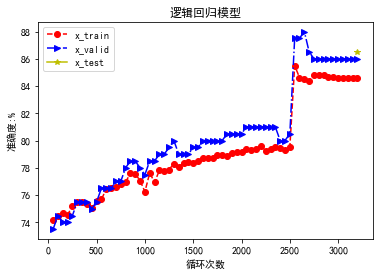

In [60]:
lg = LogisticRegression()
acc_lr,tot_cycles_lr,train_time_lr,test_time_lr = lg.train(x_train,y_train,x_valid,y_valid)

In [61]:
print('逻辑回归准确率：',acc_lr*100,'%')
print('逻辑回归循环次数：',tot_cycles_lr,'(次)')
print('逻辑回归训练时间：',train_time_lr,'s')
print('逻辑回归预测时间:',test_time_lr,'s')

逻辑回归准确率： 86.5 %
逻辑回归循环次数： 3200 (次)
逻辑回归训练时间： 0.8422977924346924 s
逻辑回归预测时间: 0.0009996891021728516 s


### 调库对比


In [62]:
from sklearn import linear_model, datasets
lr = linear_model.LogisticRegression()
start=time.time()
lr.fit(x_train, y_train)
end=time.time()
lr_train_time_sk=end-start
print("逻辑回归（sklearn库）训练时间：%.8s s" % (lr_train_time_sk) )
start=time.time()
y_test_lr_sklearn = lr.predict(x_test.values)
end=time.time()
lr_test_time_sk=end-start
print("逻辑回归（sklearn库）计算预测时间：%.8s s" % (lr_test_time_sk) )

lr_prepro = lr.predict_proba(x_test)
acc_lr_lib = lr.score(x_test,y_test)
print('逻辑回归（sklearn库）预测准确率：',acc_lr_lib*100,'%')

逻辑回归（sklearn库）训练时间：0.043883 s
逻辑回归（sklearn库）计算预测时间：0.0 s
逻辑回归（sklearn库）预测准确率： 89.5 %


### 小节
准确率方面，自己实现的逻辑回归与调库差不多。而训练时间方面，则还是调库要快很多，可能还是因为sklearn的源代码针对效率进行了很多优化的原因，需要自己看源代码去学习。而预测时间方面，自己写的逻辑回归速度快到以我使用的计时方式没法计量，但是确实没找到更精确的计时方式，这也是需要进一步学习的。

从绘制的图中可以看出，经过2500次循环后，模型的准确率基本稳定，达到阈值。

## 总结

### 预测准确率对比

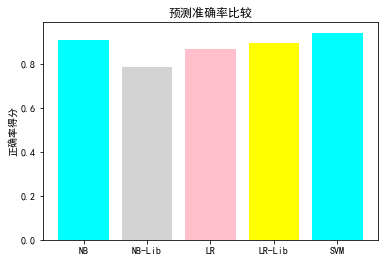

In [63]:
models=['NB','NB-Lib','LR','LR-Lib','SVM']
acc_scores=[acc_nb,acc_nb_lib,acc_lr,acc_lr_lib,acc_svm_nusvc]
plt.bar(models,acc_scores,color=['cyan','lightgrey','pink','yellow','cyan'])
plt.margin = 2
plt.ylabel("正确率得分")
plt.title("预测准确率比较")
plt.show()

可以发现，几个模型的预测准确率都在80%-92%之间，准确率相差不大。其中最为准确的是SVM算法，准确性最差的是调库的朴素贝叶斯算法。但是由于准确率本身差距不大，所以一次实验的结果并不能说明什么

### 训练时间对比

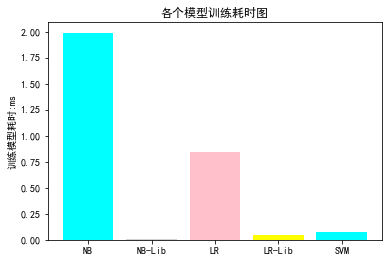

In [64]:
train_times=[nb_train_time,nb_lib_train_time,train_time_lr,lr_train_time_sk,svm_train_time]
plt.bar(models,train_times,color=['cyan','lightgrey','pink','yellow','cyan'])
plt.ylabel("训练模型耗时:ms")
plt.title("各个模型训练耗时图")
plt.show()

由图中可以看出，训练时间最长的是自己实现的朴素贝叶斯分类器，但是与之对比的是，直接调库的贝叶斯分类器训练时间很短，同时，自己实现的逻辑回归分类器，其训练时间也要比直接调库的逻辑回归长很多。这应该是自己写的代码缺少优化，或调库的代码底层是由C++等效率更高的语言实现的原因。具体原因还需要剖析库的源代码来学习。 只针对库的代码来说，花费时间最多的是SVM，这也有点超出我的预期，我个人之前认为花费时间最多的应该是逻辑回归才对。可能库的源代码采用了更高效的迭代方式，循环次数不多的的时准确率已经达到平衡，就可以快速停止迭代。朴素贝叶斯算法花费时间最短，这在预料之中，因为朴素贝叶斯算法相对简单。

### 预测时间对比

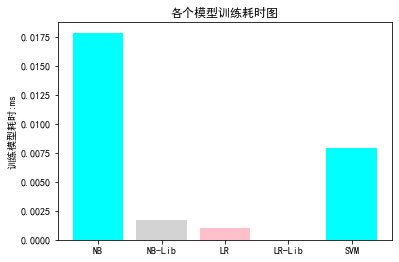

In [66]:
train_times=[nb_predict_time,nb_lib_predict_time,test_time_lr,lr_test_time_sk,svm_test_time]
plt.bar(models,train_times,color=['cyan','lightgrey','pink','yellow','cyan'])
plt.ylabel("训练模型耗时:ms")
plt.title("各个模型训练耗时图")
plt.show()

经过观察，自己实现的朴素贝叶斯算法用时最长，最短是逻辑回归算法。抛开个人实现的算法，看调库的算法，时间最长的是SVM算法，时间最短的是逻辑回归算法。这也是符合逻辑的。因为逻辑回归算法的模型一旦训练完成，在预测过程中只需要做简单计算就可以判断分类，而朴素贝叶斯算法在预测时需要做大规模连乘，SVM算法需要做类似于训练过程中的计算。计算过程更为繁琐。

### 小结

朴素贝叶斯算法的训练时间是最短的，在训练过程中计算较少，但是在预测时花费时间较长。比较适合预测样本比较少的情况。

逻辑回归的训练时间中等，预测时间极快，适合预测样本规模较大的情况。

SVM算法的训练时间和预测时间都比较长，是模型本身比较复杂的原因。实现起来较为困难，但是可靠性更高。

三者的预测准确率差距并不是很大，都能获得较为准确的结果。